<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
!pip install pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


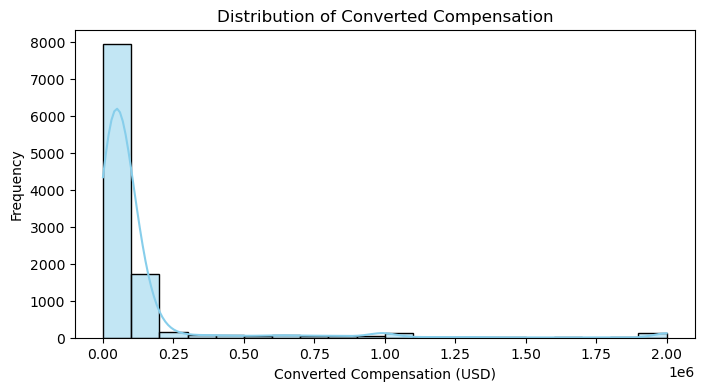

In [8]:
# your code goes here
# We can directly plot the distribution using seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df['ConvertedComp'], bins=20, kde=True, color='skyblue')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


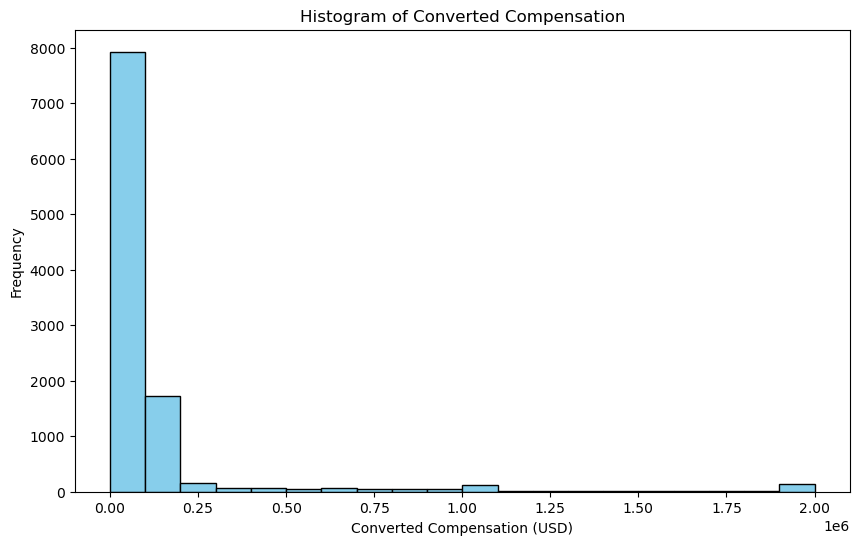

In [13]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=20, color='skyblue', edgecolor='black') # You can adjust the number of bins as per your preference
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [32]:
# your code goes here
# Count the occurrences of 'Man' in the 'Gender' column
count_man_only = df[df['Gender'] == 'Man'].shape[0]

print("Number of responders identifying only as Man:", count_man_only)

Number of responders identifying only as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
# your code goes here
# Count the occurrences of 'Man' in the 'Gender' column
count_woman_only = df[df['Gender'] == 'Woman'].shape[0]

print("Number of responders identifying only as Woman:", count_woman_only)



Number of responders identifying only as Woman: 731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [20]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
five_number_summary_age = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]

print("Five-Number Summary for Age:")
print(five_number_summary_age)

Five-Number Summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


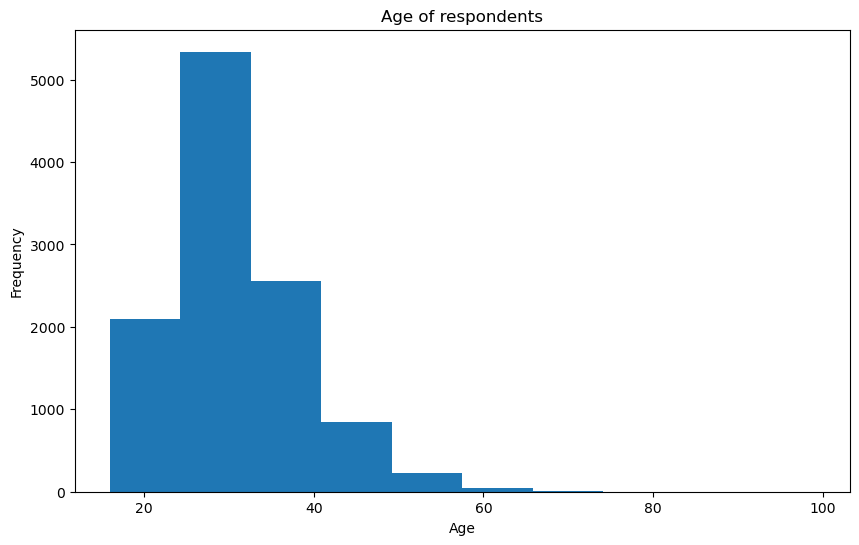

In [10]:
# your code goes here
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist')
plt.title('Age of respondents')
#plt.show()
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.title('Histogram of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


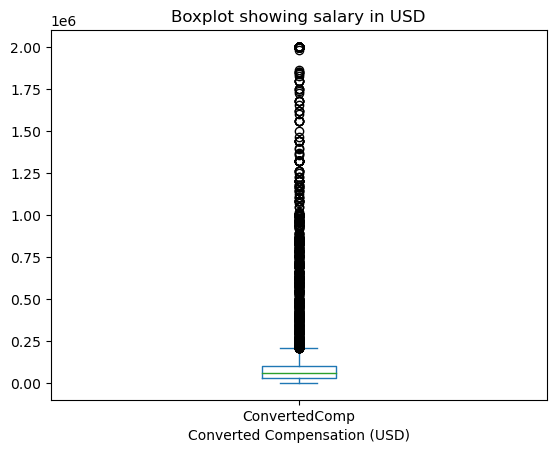

In [11]:
# your code goes here
df['ConvertedComp'].plot(kind='box')
plt.title('Boxplot showing salary in USD')

plt.xlabel('Converted Compensation (USD)')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
iqr = Q3 - Q1

print("Interquartile Range (IQR) for ConvertedComp:", iqr)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
iqr = Q3 - Q1

# Calculate the upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * iqr
lower_bound = Q1 - 1.5 * iqr

print("Upper Bound for Potential Outliers:", upper_bound)
print("Lower Bound for Potential Outliers:", lower_bound)

Upper Bound for Potential Outliers: 209698.0
Lower Bound for Potential Outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [47]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
iqr = Q3 - Q1

# Calculate the upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * iqr
lower_bound = Q1 - 1.5 * iqr

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers in the ConvertedComp column:", num_outliers)

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [48]:
# Median of ConvertedComp before removing Outliers
df['ConvertedComp'].median()

57745.0

In [14]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
iqr = Q3 - Q1

# Calculate the upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * iqr
lower_bound = Q1 - 1.5 * iqr

# Create a new DataFrame by removing outliers
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Print the new DataFrame without outliers
print(new_df)


      Respondent                      MainBranch Hobbyist  \
0              4  I am a developer by profession       No   
1              9  I am a developer by profession      Yes   
2             13  I am a developer by profession      Yes   
3             17  I am a developer by profession      Yes   
4             19  I am a developer by profession      Yes   
...          ...                             ...      ...   
9698       25134  I am a developer by profession      Yes   
9699       25136  I am a developer by profession      Yes   
9700       25137  I am a developer by profession      Yes   
9701       25138  I am a developer by profession      Yes   
9702       25141  I am a developer by profession      Yes   

                                            OpenSourcer  \
0                                                 Never   
1                            Once a month or more often   
2     Less than once a month but more than once per ...   
3     Less than once a month bu

In [52]:
#Median and Mean of ConvertedComp after removing Outliers
print('Median of ConvertedComp after removing Outliersis:',new_df['ConvertedComp'].median())
print('Mean of ConvertedComp after removing Outliersis:',new_df['ConvertedComp'].mean())

Median of ConvertedComp after removing Outliersis: 52704.0
Mean of ConvertedComp after removing Outliersis: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [12]:
# your code goes here

df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
